<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Kerastuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ready



In [1]:
import tensorflow as tf
from tensorflow import keras
import IPython
!pip install -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 96 kB 4.9 MB/s 


In [2]:

(train_img, train_labels), (test_img, test_labels) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#Normalizing
train_img = train_img.astype('float32')/255.0
test_img = test_img.astype('float32')/255.0

#Tunning


In [14]:
#Model Builder function
def model_build (hp) :
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  
  #Tune the number of units in the First Dense layer
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  #Tune the learning_rate for the optimizer
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=(True)),
                metrics=['Accuracy'])
  return model

In [16]:
tuner = kt.Hyperband(model_build, objective = 'val_Accuracy', max_epochs=10, factor=3, project_name ='FirstKT')

INFO:tensorflow:Reloading Oracle from existing project ./FirstKT/oracle.json
INFO:tensorflow:Reloading Tuner from ./FirstKT/tuner0.json


In [17]:
class ClearTrainingOutput (keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait=True)
    

In [21]:
tuner.search(train_img, train_labels, epochs=10, validation_data = (test_img, test_labels), callbacks=[ClearTrainingOutput()])
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hp

Trial 12 Complete [00h 00m 40s]
val_Accuracy: 0.8562999963760376

Best val_Accuracy So Far: 0.8866999745368958
Total elapsed time: 00h 06m 06s
INFO:tensorflow:Oracle triggered exit


In [22]:
model = tuner.hypermodel.build(best_hp)
history = model.fit(train_img, train_labels, epochs=10, validation_data = (test_img, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4844 - Accuracy: 0.8282 - val_loss: 0.4126 - val_Accuracy: 0.8525
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3655 - Accuracy: 0.8670 - val_loss: 0.4048 - val_Accuracy: 0.8543
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3268 - Accuracy: 0.8802 - val_loss: 0.3589 - val_Accuracy: 0.8690
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3013 - Accuracy: 0.8885 - val_loss: 0.3499 - val_Accuracy: 0.8718
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - Accuracy: 0.8941 - val_loss: 0.3460 - val_Accuracy: 0.8770
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2695 - Accuracy: 0.9000 - val_loss: 0.3477 - val_Accuracy: 0.8736
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2574 - Accuracy: 0.9043 - val_loss: 0.3397 - val_Accuracy:

#Plotting

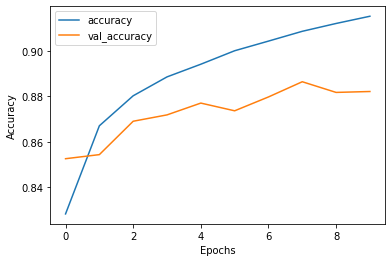

In [29]:
import matplotlib.pyplot as plt

def plot_grapgs(history, metrics):
  plt.plot(history.history[metrics])
  plt.plot(history.history['val_'+metrics],'')
  plt.xlabel('Epochs')
  plt.ylabel(metrics)
  plt.legend(['accuracy','val_accuracy'])
  plt.show()

plot_grapgs(history, 'Accuracy')

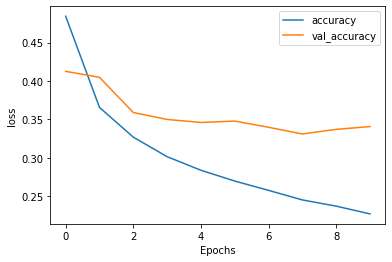

In [30]:
plot_grapgs(history, 'loss')